# COGS 108 - Assignment 2: Data Exploration

# Important

- Rename this file to 'A2_$####.ipynb' (filled in with your unique course ID) before you submit it. Submit it to TritonED.
- This assignment has hidden tests: tests that are not visible here, but that will be run on your submitted assignment.
    - This means passing all the tests you can see in the notebook here does not guarantee you have the right answer!
- Each coding question in this assignment only requires a small amount of code, about 1-3 lines. 
    - If you find yourself writing much more than that, you might want to reconsider your approach. 
    - A reminder that the Tutorials notebooks often contain similar examples to those used in the assignments.
- This assignment also has some written answers, in which you will write a short response (in text, not code). 
    - These questions are referred to as 'W#', and will be followed by a markdown cell in which you can write your answer. 
    - These are short answer questions, prompting you to think about the approaches we are using. 
    - You answers can and should be fairly brief, typically about 1-2 sentences.

In [1]:
# Imports
#  Note: these are all the imports you need! Do not import any other functions / packages
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.tools.plotting import scatter_matrix

## Part 1 - Data Wrangling

For this assignment, you are provided with two data files:
- age_steps.csv
- name_income_id.json

In [2]:
# 1a) Load the csv file into a pandas dataframe. Call it 'df_steps'.

# YOUR CODE HERE
df_steps=pd.read_csv('age_steps.csv')

In [3]:
# Tests for 1a

assert isinstance(df_steps, pd.DataFrame)


In [4]:
# 1b) Load the json file into a (different) pandas dataframe. Call it 'df_income'.

# YOUR CODE HERE
df_income=pd.read_json('name_income_id.json')

In [5]:
# Tests for 1b

assert isinstance(df_income, pd.DataFrame)


In [6]:
# 1c) Drop the 'first_name' and 'last_name' columns from the df_income data frame.

# YOUR CODE HERE
df_income.drop(['first_name','last_name'],axis=1,inplace=True)

In [7]:
# Tests for 1c

assert 'first_name' not in df_income.columns
assert 'last_name' not in df_income.columns

In [8]:
# 1d) Combine the two dataframes into one combined, new dataframe. Call it 'df'.
#  Both dataframes should have a column called 'id' use this column to align the datasets (merge on 'id')
#  Note: For this part, it doesn't in which order you merge the dataframes.

# YOUR CODE HERE
df = df_income.merge(df_steps, on='id')
print(df)

         id     income  age  steps
0     41008   35081.75   69  16091
1     80974   21240.47   39  17088
2     49639   18789.55   80   9257
3     86949   23302.03   67  11047
4     76586    9862.30   51  23264
5     85016   27092.51   54  22429
6     40864   18229.02   53  19388
7     46642   21814.85   46  16231
8     28875    9967.79   73  16722
9     23792   15443.25   20   9996
10    14036   12523.10   42  15508
11    42479   51972.76   59  17183
12    12669    6716.17   31  21638
13    30193    5803.22   65  14261
14    58683   59941.80   57  15684
15    94150   20318.97   39  17262
16    93229    4480.07   33  16737
17    46993    1069.19   52  16305
18    45211   14430.17   70  18998
19     6429    8158.18   41  24689
20    57354    6850.81   41  12420
21    85343   31669.95   41  26701
22    61066   10015.62   52  15350
23    85462   27058.26   57  23070
24    76509   29813.42   44  21581
25     5277       0.00   44  20103
26    25090   28898.60   39  14906
27    44373   47944.

In [9]:
# Tests for 1d

assert isinstance(df, pd.DataFrame)
assert set(df.columns) == set(['id', 'income', 'age', 'steps'])

In [10]:
# 1e) Re-Order the Column ID's to be [id, age, steps, income]

# YOUR CODE HERE
df = df.reindex_axis(['id','age','steps','income'], axis=1)

In [11]:
# Tests for 1e

assert list(df.columns) == ['id', 'age', 'steps', 'income']

In [12]:
# 1f) Make two different copies of 'df'. 
# Call the first one 'df2', and the second one 'df3'.
# Note: Simply writing 'df2 = df' and 'df3 = df' will NOT work!
#   A quick google search reveals how to properly copy dataframes.

# YOUR CODE HERE
df2 = df.copy(deep=True);
df3 = df.copy(deep=True);

In [13]:
# Tests for 1f

assert(df2 is not df)
assert(df3 is not df)

## Part 2 - Data Cleaning

Before analysis, data must be cleaned of missing or unusable data. 

Now that the datasets are joined into a single dataframe, the next steps are to remove or replace any bad data before moving onto any analyses. 

In [14]:
# 2a) First check how many missing data (NaNs) there are in the income data.
#  Save this number into a variable called 'n_nan'

# YOUR CODE HERE
n_nan = df_income.values.any()

In [15]:
# Tests for 2a

assert(n_nan)


In [16]:
# 2b) Remove all rows from df that have missing data. 
#  In other words, remove all rows with NaN values.

# YOUR CODE HERE
df = df_income.dropna()

In [17]:
# Tests for 2b

assert sum(np.isnan(df['income'])) == 0

In [18]:
# 2c) Create a variable called `mean_income` which holds the average income in df

# YOUR CODE HERE
mean_income = n_nan.mean()

In [19]:
# Tests for 2c

assert mean_income


In [20]:
# 2d) In df2, replace all missing values with `mean_income`

# YOUR CODE HERE
df2 = df2.fillna(mean_income)

In [21]:
# Tests for 2d

assert not df2['income'].hasnans


### W1 - Missing Data

You just used two different approaches for dealing with missing data: dropping the rows and replacing with the mean. 

For each approach, briefly describe below when you think it would be appropriate to use this approach. 

When is best to use one approach over the other?

If you have enough data to fill in when there is data missing, then you can replace the missing data with the mean. I believe that the appropraite time to do this is when you are sure that replacing the data is better than simply dropping it because it is important so replacing will be sufficient.

If you do not have enough data to fill in the remaining missing data, then you should just drop the rows that have empty or missing data in them. If you can't fabricate enough data to fill in the missing data in the rows, the best is just to drop them overall.

## Part 3: Data Visualization

Here we will start exploring our data visually, using some plots. 

In particular, we will plot the distributions of each of our variables, in such a way as to let us get a sense of the data, and look for any problems. 

Pandas comes with some plotting capabilities. We will also be making histograms, which can be done with matplotlib.

Here's an example of making histograms: http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html

This example has more than you need: 
- Titles, axis labels, etc are optional (but recommended)
- You do no need to add a 'best fit' line.

Notes:

- Everywhere that we ask you to create a plot, make sure to leave the 'plt.gcf()' line at the end of the cell. 
    - This is used to get a figure handle in order to programmatically evaluate your plots.
- For all your histograms, use 25 bins

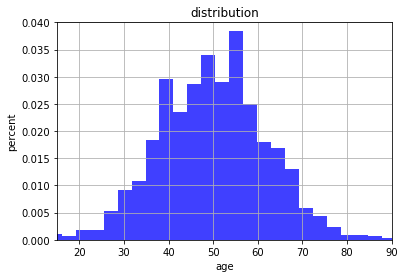

In [22]:
# 3a) Plot a histogram of the age variable

# YOUR CODE HERE
x = df2['age']
n, bins, patches = plt.hist(x, 25, normed=1, facecolor='blue', alpha=0.75)

plt.xlabel('age')
plt.ylabel('percent')
plt.title('distribution')
plt.axis([15,90,0,0.04])
plt.grid(True)

f1 = plt.gcf()

In [23]:
# Tests for 3a

assert f1.gca().has_data()

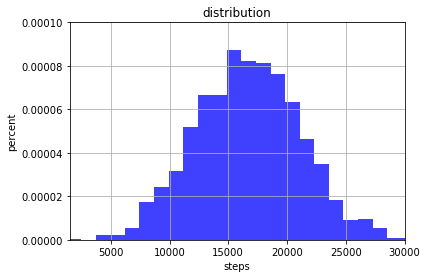

In [24]:
# 3b) Plot a histogram of the steps variable

# YOUR CODE HERE
x = df2['steps']
n, bins, patches = plt.hist(x, 25, normed=1, facecolor='blue', alpha=0.75)

plt.xlabel('steps')
plt.ylabel('percent')
plt.title('distribution')
plt.axis([1500,30000,0,0.0001])
plt.grid(True)


f2 = plt.gcf()

In [25]:
# Tests for 3b

assert f2.gca().has_data()

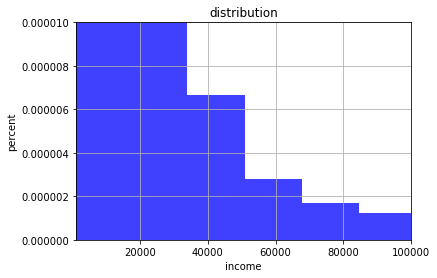

In [26]:
# 3c) Plot a histogram of the income variable

# YOUR CODE HERE
x = df2['income']
n, bins, patches = plt.hist(x, 25, normed=1, facecolor='blue', alpha=0.75)

plt.xlabel('income')
plt.ylabel('percent')
plt.title('distribution')
plt.axis([1000,100000,0,0.00001])
plt.grid(True)

f3 = plt.gcf()

In [27]:
# Tests for 3c

assert f2.gca().has_data()

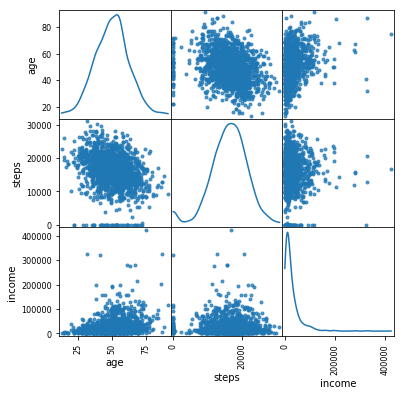

In [28]:
# 3d) Plot the data using pandas scatter_matrix, saving it to output variable name 'fd'.
#  Only plot the 'age', 'steps', and 'income' variables.

# YOUR CODE HERE
params = ['age','steps','income']
fd = pd.tools.plotting.scatter_matrix(df2[params], alpha=0.75, figsize=(6,6), diagonal='kde')

In [29]:
# Tests for 3d

assert len(fd[0]) == 3
assert np.all(ax.has_data() for ax in fd[0])

### W2 - What do you notice about data now that you've visualized it?

For each of 'steps', 'income' and 'age', write a quick comment on each of anything that you notice from the above visualizations, that may need to be addressed before moving onto data analysis. 

In particular:
- Are there outliers or bad values we need to fix? 
- Might we want to transform any of the distributions?

It looks like both steps and age are more evenly distrubted because when I was creating the hist graph, it was easier to find how to plot it but for income, there were numbers as high as 100,000 and as low as 1,000. I tried messing around with it to figure out how to get it to look the best but it was difficult. 

## Part 4: Data Pre-Processing

In the above sections, we did some basic data cleaning, and visualization. 

In practice, these two components of an analysis pipeline are often combined into an iterative approach, going back and forth between looking at the data, checking for issues, and then cleaning the data. 

In this next section we will continue with an iterative procedure of data cleaning and visualization, addressing some issues that we can start to see when visualizing the data.

In [30]:
# 4a) Dealing with an impossible value in 'steps'. 
#  Check how many -1 values there are in steps. 
#  Save the number into a variable called 'n_neg'

# YOUR CODE HERE
n_neg = sum(df2['steps']== -1)

In [31]:
# Tests for 4a

assert(n_neg)


In [32]:
# 4b) Remove all rows where steps is equal to -1

# YOUR CODE HERE

df2 = df2[df2['steps'] > 0]

In [33]:
# Tests for 4b

assert sum(df2['steps'] == -1) == 0

### W3 - Transforming Distributions

Once thing you might have noticed is that the income is not normally distributed. 

In the next steps, we will address this by log transforming the income data. First though, we will have to deal with any income values that are 0. Note that these values are not impossible values, but may, for example, reflect people who are unemployed. 

Why are are we log-transforming the data, and how does that help us? Why do we have to do something special with 0's?

Hint: calculate log10 of zero, and see what the answer is. 

Log base 10 of 0 is not defined, therefore we have to get rid of 0's before we log transform the data of income. Since it is not normally distributed, log transforming it will make it more evenlly distributed and it would look better in our graph. It will also give us a closer estimate to the real percentage and distribution of income.

In [54]:
# 4c) For all rows in which income is equal to zero, recode income to be equal to 1

# YOUR CODE HERE
#zero = df2['income'] == 0
#zero = 1



df2['income'] = df2['income'].replace(0,1, inplace=True)

IndexError: invalid index to scalar variable.

In [55]:
# Tests for 4c

assert sum(df2['income'] == 0.) == 0

IndexError: invalid index to scalar variable.

In [56]:
# 4d) Transform income using a log10 transform

# YOUR CODE HERE
df3['income'] = np.log(10)
print(df.income)

AttributeError: 'NoneType' object has no attribute 'income'

In [57]:
# Tests for 4d

assert np.isclose(min(df['income']), 0.0, 0.05)
assert np.isclose(max(df['income']), 5.62, 0.05)

TypeError: 'NoneType' object is not subscriptable

In [ ]:
# 4e) Replot the histogram for income data after the data transformation

# YOUR CODE HERE
raise NotImplementedError()

f4 = plt.gcf()

In [ ]:
# Tests for 4e

assert f4.gca().has_data()

In [ ]:
# 4f) We might also have certain regulations or restrictions that we need to follow about the data. 
# Here, we will only analyze adults. Remove all rows where age is less than 18.

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Tests for 4f

assert min(df['age']) >= 18

## Part 5 Outliers

So far, we have dealt with the most clearly wrong or impossible data values. 

We might still might need to deal with more subtle outliers: values that seem abnormally high or low. These values may seem suspicious, and they may skew our analyses. 

In this step, we are going to deal with outlier values by removing all rows in which the data for the steps column exceeds +/- 3 standard deviations above or below the mean.

Note that when you perform this kind of outlier removal can have large impacts. For example, the procedure we take here might give quite different results if we did it before removing the -1 values in steps. 

In [ ]:
# 5a) For the steps data: 
# - Calculate what three times the standard deviation is, and save it to variables called 'std3'. 
#    Note: you must use pandas to calculate the standard devation!
#    Pandas & Numpy use slightly different conventions for std, so using numpy here will get a different value
# - Using 'std3', create new variables, called std_max' and 'std_min'.
#    These will store our cut-off values: 3 std above and below the mean respectively. 

# YOUR CODE HERE
std = df2['steps'].std()
std3 = std * 3 

std_max = std + 3
std_min = std - 3

In [ ]:
# Tests for 5a

assert(std3)
assert(std_min)
assert(std_max)


In [ ]:
# 5b) Now use these values to remove any rows with steps data above or below these thresholds

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Tests for 5b

assert np.all(df['steps'])


In [ ]:
# CHECK IN
# Check that the following test passes - if it fails, you have the wrong amount of data left. 
#  If so, go back and try to fix your cleaning steps, else your analysis answers will be wrong.
assert df.shape == (1463, 4)

## Part 6 - Basic Analyses

Now that we have wrangled and cleaned our data, we can start doing some simple analyses. 

Here we will explore some basic descriptive summaries of our data, look into the inter-relations (correlations) between variables, and ask some simple questions about potentially interesting subsets of our data. 

In [ ]:
# 6a) Descriptive summary
# Use the 'describe' pandas method to check a descriptive summary of the data
#   Save the dataframe generated by describe to a new variable called 'desc'

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Tests for 6a

assert isinstance(desc, pd.DataFrame)

In [ ]:
# 6b) Calculate the pairwise correlations between all variables. 
#  Notes: do this with a pandas method. Keep all columns (including ID).
#  Assign the result (which should be a dataframe) to a variable called 'corrs'.

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Tests for 6b

assert isinstance(corrs, pd.DataFrame)
assert corrs.shape == (4, 4)

In [ ]:
# 6c) Checking correlations
# Answer the following questions by setting to answer variable to 'age', 'steps', or 'income'
# Which variable is most correlated with age? Set the answer in a variable called 'age_corr'. 
# Which variable is most correlated with income? Set the answer in a variable called 'inc_corr'. 

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Tests for 6c

assert age_corr
assert inc_corr


In [ ]:
# 6d) How many steps would you have to walk to be in the top 10% of walkers
#  Save you answer as a variable called 'top_walker'
#  Hint: check out the 'quantile' method.

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Tests for 6d

assert top_walker


In [ ]:
# 6e) What is the average income for people over the age of 45?
# Save your response in a variable called 'old_income'.
# Note: for this response, keep the answer as the logged value (do no 'un-log' the answer).

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Tests for 6e
assert old_income


# Part 7 - Predictions

A frequent goal of data analysis is to understand so that we can make predictions about future or unseen data points. 

Here we will explore some basic predictions, looking into whether we might be able to predict income from our other variables.

Notes:
- Use the polyfit function from numpy, in the way that we did in 'SectionMaterials/02-DataAnalysis
- The predictions for income should be in dollars (so you'll have to 'un-log' the prediction)

In [ ]:
# 7a) Use polyfit to fit a 1-degree linear model, predicting income from age.
#  Call the output parameters 'a1' and 'b1'

# YOUR CODE HERE
a1, b1 = np.polyfit(df['age'],df['income'],1)

In [ ]:
# Tests for 7a

assert(a1)
assert(b1)


In [ ]:
# 7b) Use the model parameters from 4a to predict the income of a 75 year old. 
#  Call your prediction 'pred1'.
#  Note: Convert the prediction to be in real dollars (not log dollars)

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Tests for 7b

assert(pred1)


In [ ]:
# 7c) Use polyfit to fit a 1-degree linear model, predicting income from steps. 
#  Call the output parameters 'a2' and 'b2'

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Tests for 7c

assert(a2)
assert(b2)


In [ ]:
# 7d) Predict the income of someone who took 20,000 steps. Call your prediction 'pred2'.
#  Note: Convert the prediction to be in real dollars (not log dollars)

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Test for 7d

assert(pred2)


In [ ]:
# 7e) Based on your analysis in Part 3, which model do you think is more likely to have made a good prediction?
#  Create a variable called 'better_model', and set it equal to 'age' or 'steps', whichever your answer is.

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert better_model


### W4 - Why do you think (whichever model you answered) is better?

YOUR ANSWER HERE

## 8  - Revisiting Missing Values

Originally, we dealt with missing values by either dropping rows that contained them or by replacing them with the mean value of that column. 

Another approach one can take is to predict missing values, based on the rest of the available data.

In [ ]:
# 8a) Create a function named `predict_income` that takes one parameter, `age`.
#
# This function will take in as input an individual's age, and return their predicted income.
# This function should use your parameters `a1` and `b1` to do so.
# Also, make sure that the function returns predictions in dollars (not logged values).
# Note that this function should require no more than 2 or 3 lines.

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Tests for 8a

assert callable(predict_income)


In [ ]:
# Using the function you defined, the following code will apply the function to the dataframe (this code provided)
#  Now, the variable 'my_predictions' holds the predicted income for every row in df3. 
my_predictions = df3['age'].apply(predict_income)

### W5: Pandas .apply()

The code that you see in the line above uses a pandas method called 'apply'. 

It is a very powerful method, and can be useful in many situations.

Look into the '.apply()' method (remember you can use '?' in notebooks to see documentation). 

In the cell below, briefly explain what pandas '.apply()' method is, and what it does.

YOUR ANSWER HERE

In [ ]:
# 8b) Create a new column in df3 named `predicted_income`. 
#   This column should includes the income that your model (a1, b1) predicts for each individual given their age. 
# Hint: you can use 'my_predictions', from above. 

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Tests for 8b

assert 'predicted_income' in df3.columns


### W6: When do you think that it is NOT appropiate to use prediction models to fill in missing data? 

YOUR ANSWER HERE

## Done! Upload this notebook to TritonED